# Fast lap analysis

First create an InfluxDB client by importing the modules and setting all the required configuration.

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS

import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

# configure influxdb client
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

# and create the client and a quary api
client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)
query_api = client.query_api()

gameName = "iRacing"
trackCode = "sebring international"
carModel = "Ferrari 488 GT3 Evo 2020"

Find all sessions for our track and car.

In [44]:
query = f"""
    from(bucket: "racing")
        |> range(start:-10y, stop: now())
        |> filter(fn: (r) => r._field == "CurrentLapTime" and r["GameName"] == "{gameName}" )
        |> filter(fn: (r) => r["CarModel"] == "{carModel}" )
        |> filter(fn: (r) => r["TrackCode"] == "{trackCode}" )
        |> last()
        |> limit(n: 1)
        |> keep(columns: ["_time", "_value", "CarModel","TrackCode", "SessionId", "SessionTypeName"])
        |> group()
"""

df = query_api.query_data_frame(org=ORG, query=query)
df

,result,table,_time,_value,CarModel,SessionId,SessionTypeName,TrackCode
0,_result,0,2022-11-22 18:56:23.426000+00:00,101.137070,Ferrari 488 GT3 Evo 2020,1669141800,Practice,sebring international
1,_result,0,2022-11-22 19:00:01.518000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143592,Race,sebring international
2,_result,0,2022-11-22 19:00:03.579000+00:00,2.023300,Ferrari 488 GT3 Evo 2020,1669143601,Race,sebring international
3,_result,0,2022-11-22 19:01:02.437000+00:00,60.839966,Ferrari 488 GT3 Evo 2020,1669143603,Race,sebring international
4,_result,0,2022-11-22 19:01:43.521000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143678,Race,sebring international
5,_result,0,2022-11-22 19:01:45.643000+00:00,2.156700,Ferrari 488 GT3 Evo 2020,1669143703,Race,sebring international
6,_result,0,2022-11-22 19:06:25.404000+00:00,21.816000,Ferrari 488 GT3 Evo 2020,1669143705,Race,sebring international
7,_result,0,2022-11-22 19:06:51.497000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143986,Race,sebring international
8,_result,0,2022-11-22 19:06:54.695000+00:00,3.223333,Ferrari 488 GT3 Evo 2020,1669144011,Race,sebring international
9,_result,0,2022-11-22 19:10:17.410000+00:00,70.870100,Ferrari 488 GT3 Evo 2020,1669144014,Race,sebring international


Now we can query the data for a specific session.

In [45]:
# get the last row in the dataframe
SESSION = df.iloc[-1]["SessionId"]

query = f"""
from(bucket: "racing")
  |> range(start: -10y, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "laps_cc")
//  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
  |> filter(fn: (r) => r["SessionId"] == "{SESSION}")
  |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
  |> sort(columns: ["_time"], desc: false)
"""

df = query_api.query_data_frame(org=ORG, query=query)
df

,result,table,_start,_stop,_time,CarModel,GameName,SessionId,SessionTypeName,TrackCode,...,Clutch,CurrentLap,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle
0,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:01:12.930000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,1.0,0.000000,5564.84961,3.0,0.0,0.0,46.207565,-0.232568,0.995530
1,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:01:12.961000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,1.0,0.000000,5566.41300,3.0,0.0,0.0,46.332516,-0.209542,0.995530
2,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:01:12.992000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,1.0,0.000000,5567.98000,3.0,0.0,0.0,46.448074,-0.183351,0.995530
3,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:01:13.022000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,1.0,0.000000,5569.55127,3.0,0.0,0.0,46.567780,-0.165505,0.995530
4,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:01:13.053000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,1.0,0.000000,5571.12600,3.0,0.0,0.0,46.689392,-0.153704,0.995530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31696,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:17:35.916000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,8.0,116.171837,5431.58936,3.0,0.0,0.0,39.422905,-1.282066,0.993758
31697,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:17:35.947000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,8.0,116.205170,5432.85800,3.0,0.0,0.0,39.517963,-1.265377,0.993758
31698,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:17:35.978000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,8.0,116.238500,5434.13100,3.0,0.0,0.0,39.610830,-1.265090,0.993758
31699,_result,0,2012-11-23 23:06:04.927784+00:00,2022-11-24 11:06:04.927784+00:00,2022-11-23 20:17:36.009000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669233672,Race,sebring international,...,1.0,8.0,116.255165,5434.76855,3.0,0.0,0.0,39.651722,-1.259335,0.994944


Now we can plot the data, starting with just the brake inputs and the time on the x axis.

<AxesSubplot:xlabel='datetime'>

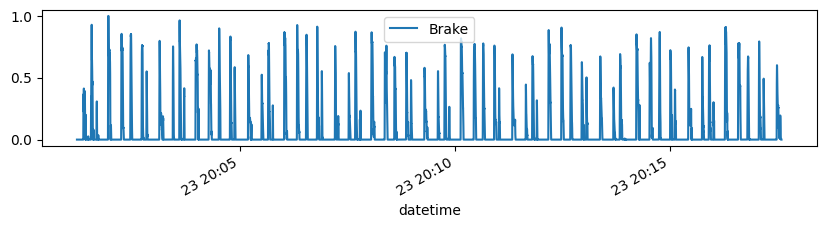

In [46]:
brake = df.copy()
brake = brake[["Brake", "_time"]]
brake["datetime"] = pd.to_datetime(brake["_time"])
brake.drop(columns=["_time"], inplace=True)
brake.set_index("datetime", inplace=True)
brake.sort_index(inplace=True)
plt.rcParams["figure.figsize"] = (10, 2)
brake.plot()

Now plot every other value column, the x-axis is the just the index of the DataFrame.

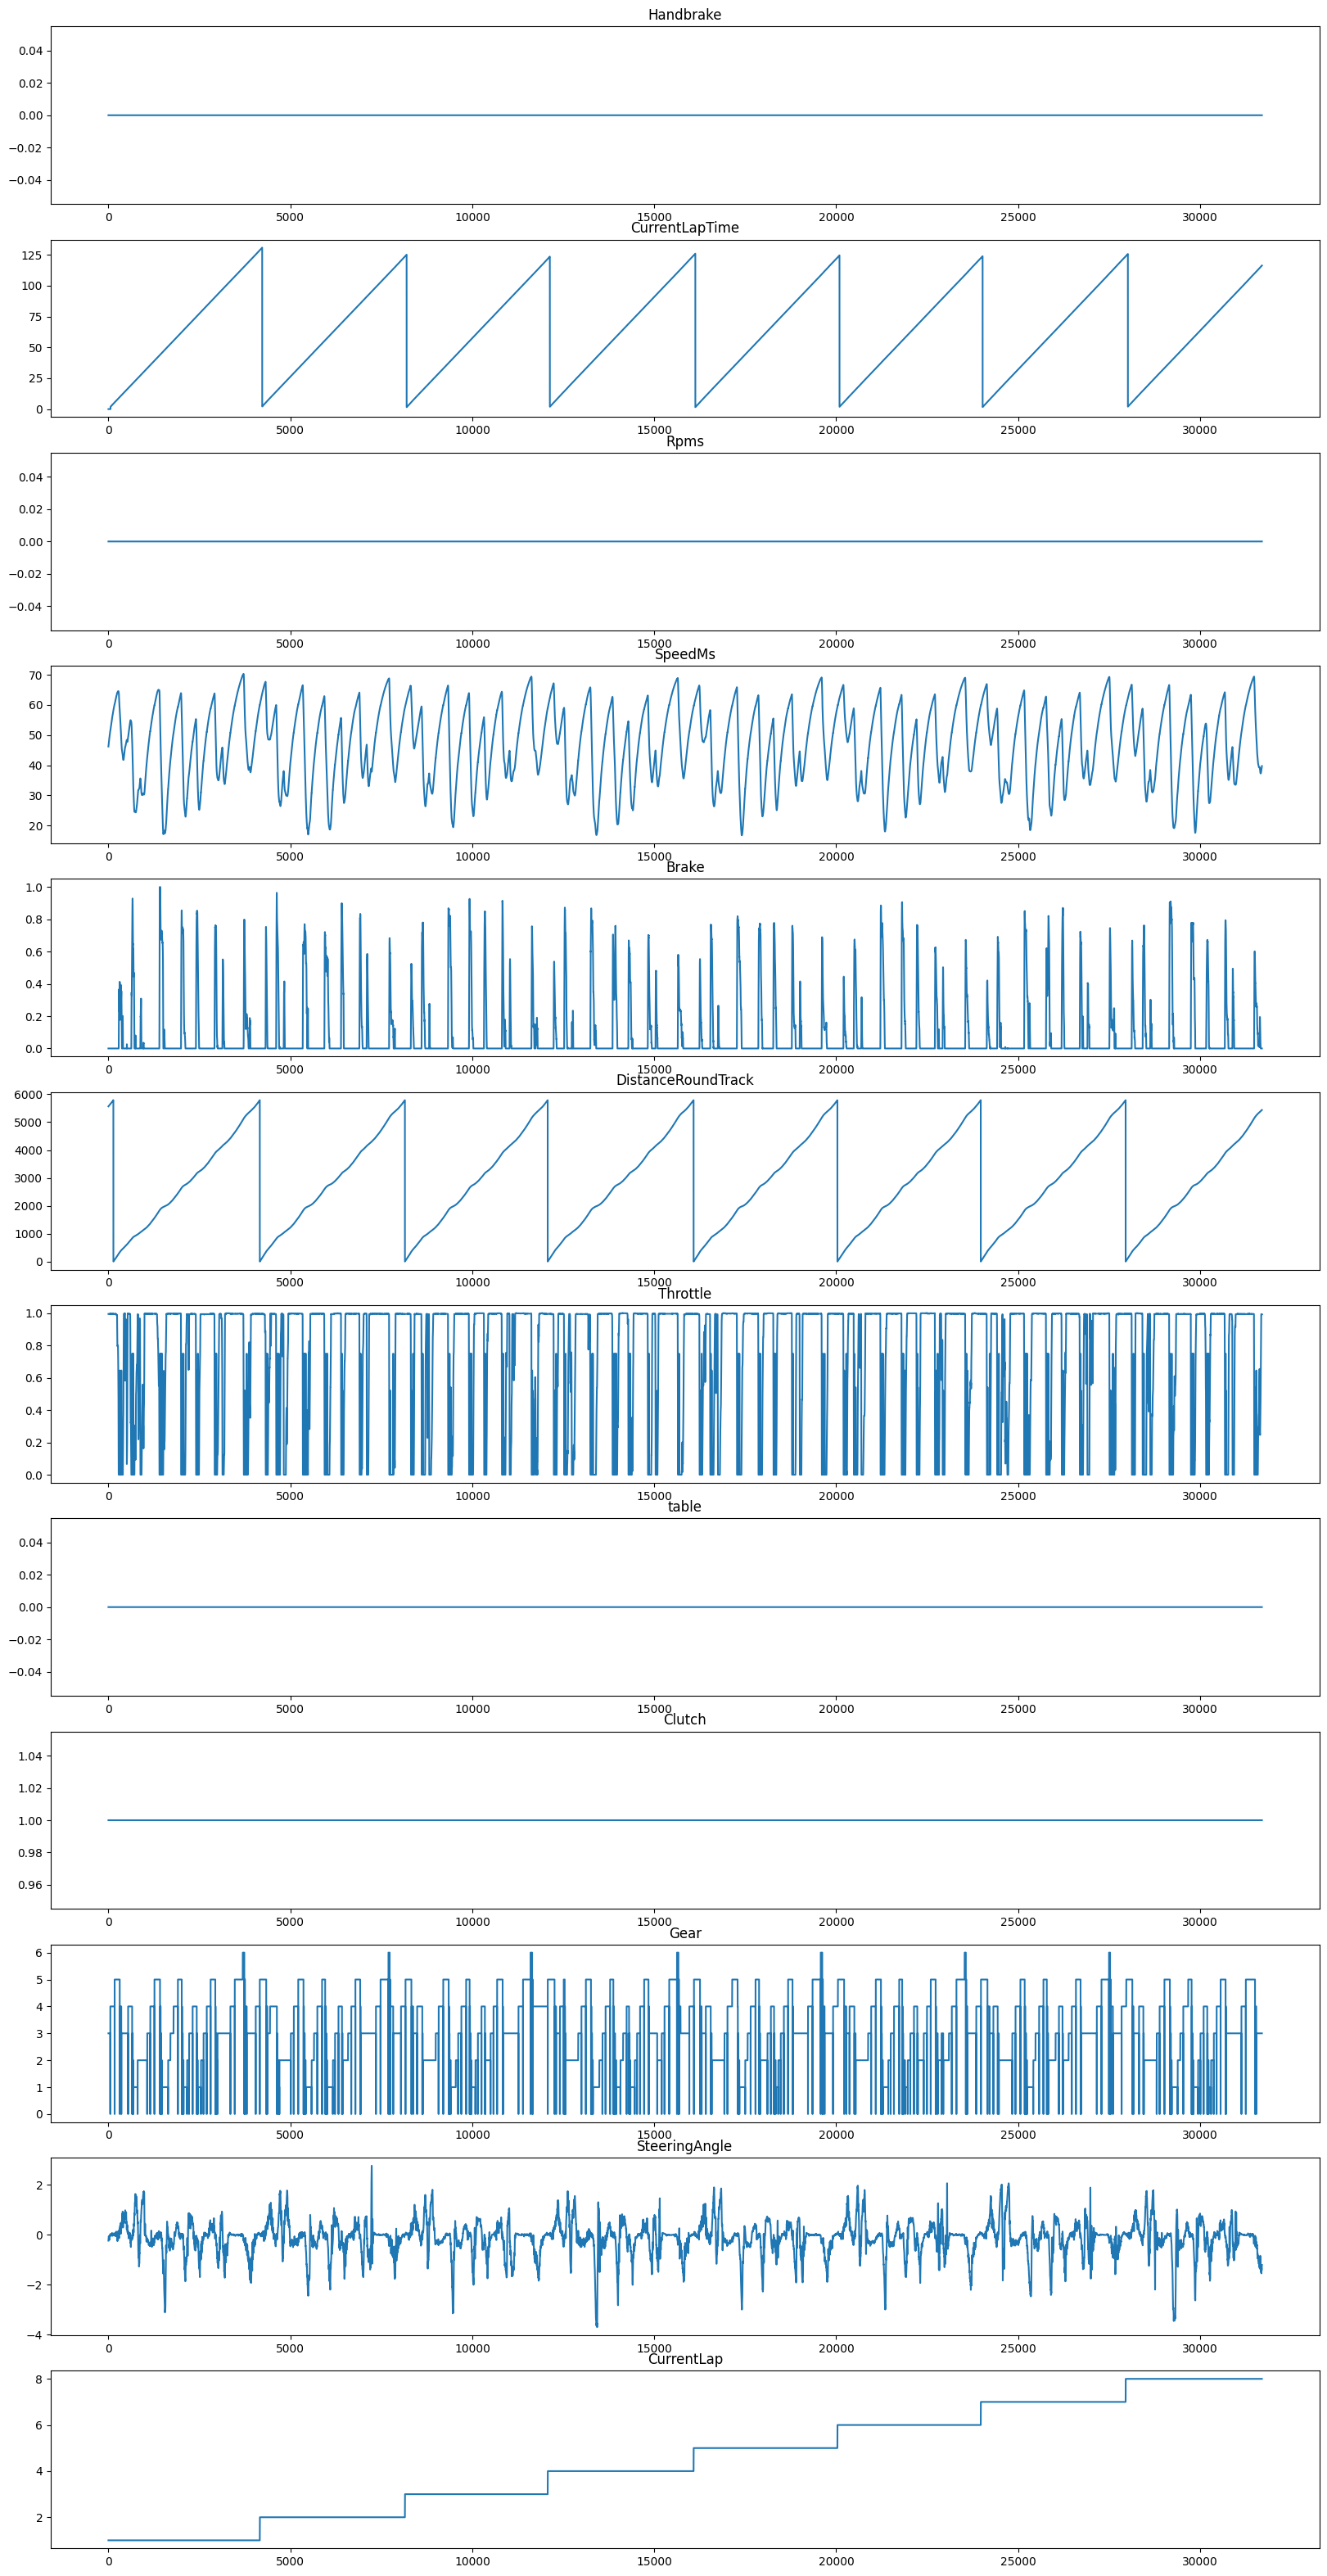

In [47]:
plt.rcParams["figure.figsize"] = (20, 40)
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
newdf = df.select_dtypes(include=numerics)
cols = set(newdf.columns)
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    newdf[c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

And just a single lap.

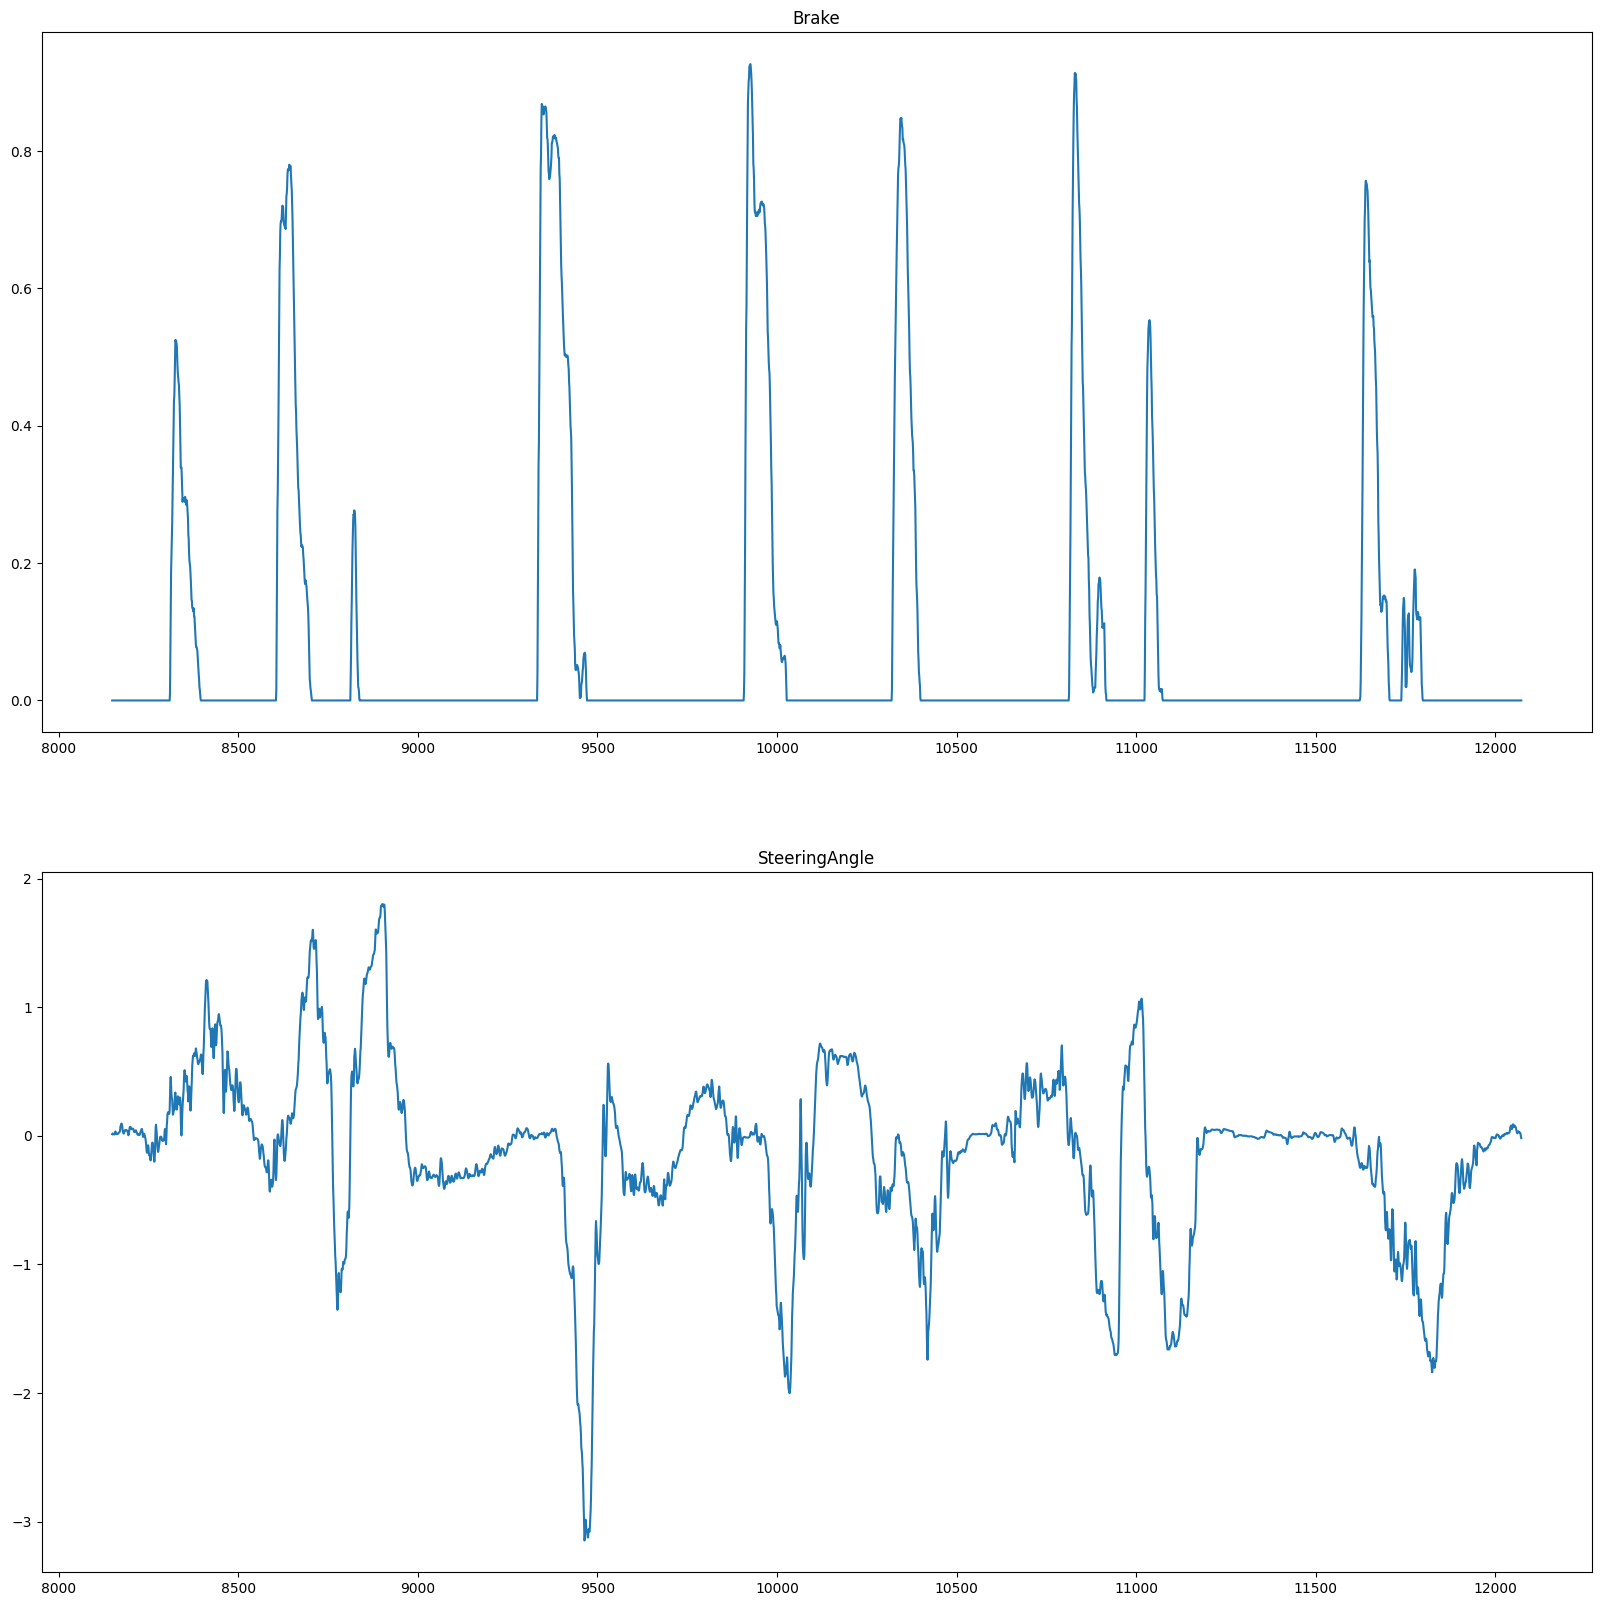

In [48]:
lap = 3
plt.rcParams["figure.figsize"] = (20, 20)
cols = ["Brake", "SteeringAngle"]
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    df.loc[df["CurrentLap"] == lap, c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

Now we plot all brake values for all laps against the distance.

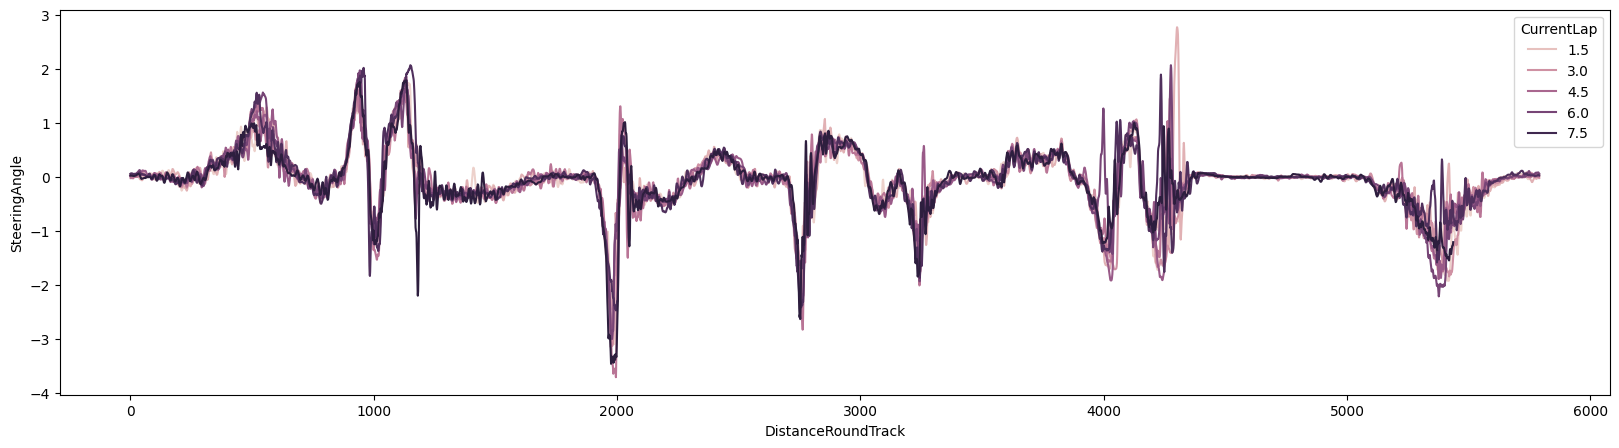

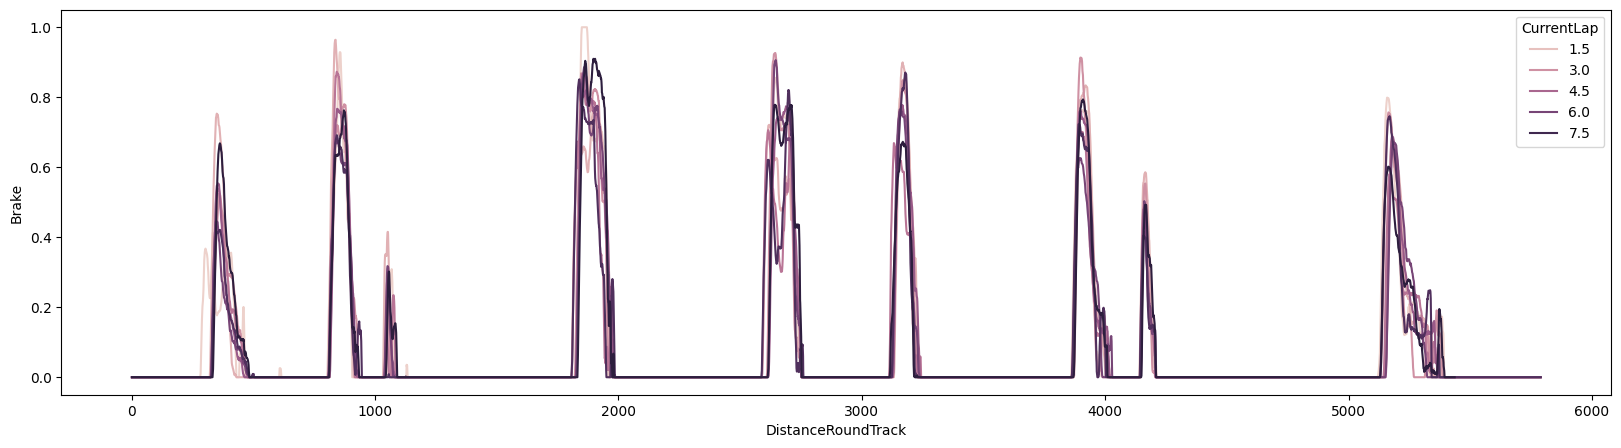

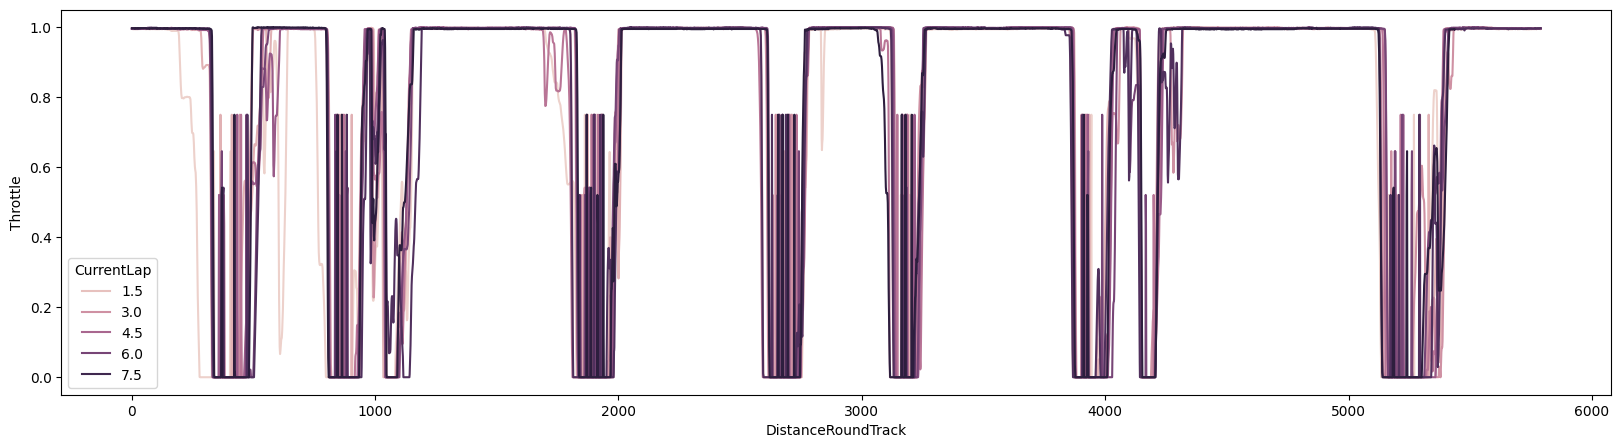

In [49]:
plt.rcParams["figure.figsize"] = (20, 5)
for c in ["SteeringAngle", "Brake", "Throttle"]:
    sns.lineplot(data=df, x="DistanceRoundTrack", y=c, hue="CurrentLap", legend=True)
    plt.show()

# Find n fastest laps

Iterate over all sessions and find the n fastest laps. A lap is considered complete, if the `DistanceRoundTrack` is reached. The time for a lap is the last value of the `CurrentLapTime` column.

# Splice a track into segments

Using the combined / averaged values of the `SteeringAngle` data, we want to splice the track `DistanceRoundTrack` into segments. 
* A segement is defined by the start and end of a major turn.
* Each segment connects directly to the next segment.
* The start of a segment is the middle betwee two turns (i.e not just at the beginning of a turn).

See below for the example of the `sebring international` track.


# Extract track data from fastest laps

From all fastest laps we want to extract the average value for the track guide data.


In [50]:
# load csv into dataframe
df = pd.read_csv("../pitcrew/Ferrari 488 GT3 Evo 2020-sebring international.csv")
df

,turn,start,end,brake,turn_in,force,gear,speed,accelerate,mark
0,1,0,750,325.0,325.0,50.0,4.0,180.0,510.0,NaN
1,2-4,750,1000,825.0,875.0,80.0,2.0,100.0,950.0,NaN
2,5,1000,1250,1040.0,1040.0,40.0,2.0,110.0,1100.0,NaN
3,6,1250,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,1800,2100,1825.0,1930.0,80.0,1.0,70.0,1975.0,NaN
5,8-9,2100,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10-11,2400,3000,2640.0,2700.0,90.0,2.0,90.0,2750.0,NaN
7,12-13,3000,3350,3130.0,3180.0,80.0,2.0,110.0,3230.0,NaN
8,14,3350,3750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15,3750,4050,3870.0,3920.0,80.0,3.0,130.0,4000.0,NaN


* start / end: the start and end of the turn (see above)
* brake: the average DistanceRoundTrack when the brake is pressed the first time
* turn_in: the average DistanceRoundTrack when the steering wheel is turned into the corner (maybe use rate of change)
* force: the average value of the maximum brake force during the turn 
* gear: the average value of the lowest gear during the turn
* speed: the lowest value during the turn
* stop: the average value when the brake force is starting to decrease
* accelerate: the average DistanceRoundTrack when the throttle is pressed again during the turn
